In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#df = pd.read_csv('input/bbc_news_cleaned.csv')
#df = pd.read_csv('input/5_categories_cleaned.csv')
df = pd.read_csv('input/20_categories_joined_cleaned.csv')
df.head()

,category,text
0,crime,2 mass shooting texas last week 1 tv left husb...
1,entertainment,smith join diplo nicky jam 2018 world cup offi...
2,entertainment,hugh grant marries first time age 57 actor lon...
3,entertainment,jim carrey blast castrato adam schiff democrat...
4,entertainment,julianna margulies us donald trump poop bag pi...


In [3]:
'''
#Plots the distribution of categories
fig = plt.figure(figsize=(8,6))
df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()
'''
#Information about data
print("Dimenzije podatkov:")
print(df.shape)
print("\nStevilo besed:")
print(df.text.str.split().str.len().sum())
print("\nKategorije:")
print(df.groupby('category').text.count())

Dimenzije podatkov:
(200853, 2)

Stevilo besed:
3545580.0

Kategorije:
category
arts & culture     3878
black voices       4528
business           5936
comedy             5173
crime              3405
divorce            3426
education          2148
entertainment     16057
environment        3945
fifty              1400
food & drink       8322
good news          1398
healthy living    24519
home & living      4195
impact             3459
latino voices      1129
media              2814
money              1707
parenting         12632
politics          32737
queer voices       6313
religion           2556
science            2178
sport              4884
style & beauty    11903
tech               2082
travel             9887
weddings           3651
weird news         2670
women              3490
world news         8419
Name: text, dtype: int64


In [4]:
#create tf-idf matrix
df['text'] = df['text'].astype('U')
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', stop_words='english')
features = tfidf.fit_transform(df.text)
labels = df['category'].factorize()[0]
features.shape

(200853, 23849)

In [9]:
#create and train LinearSVC model, uses KFold cross validation
clf = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#cross-validation for parameter tuning
#scores = cross_val_score(clf, features, labels, scoring='accuracy', cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

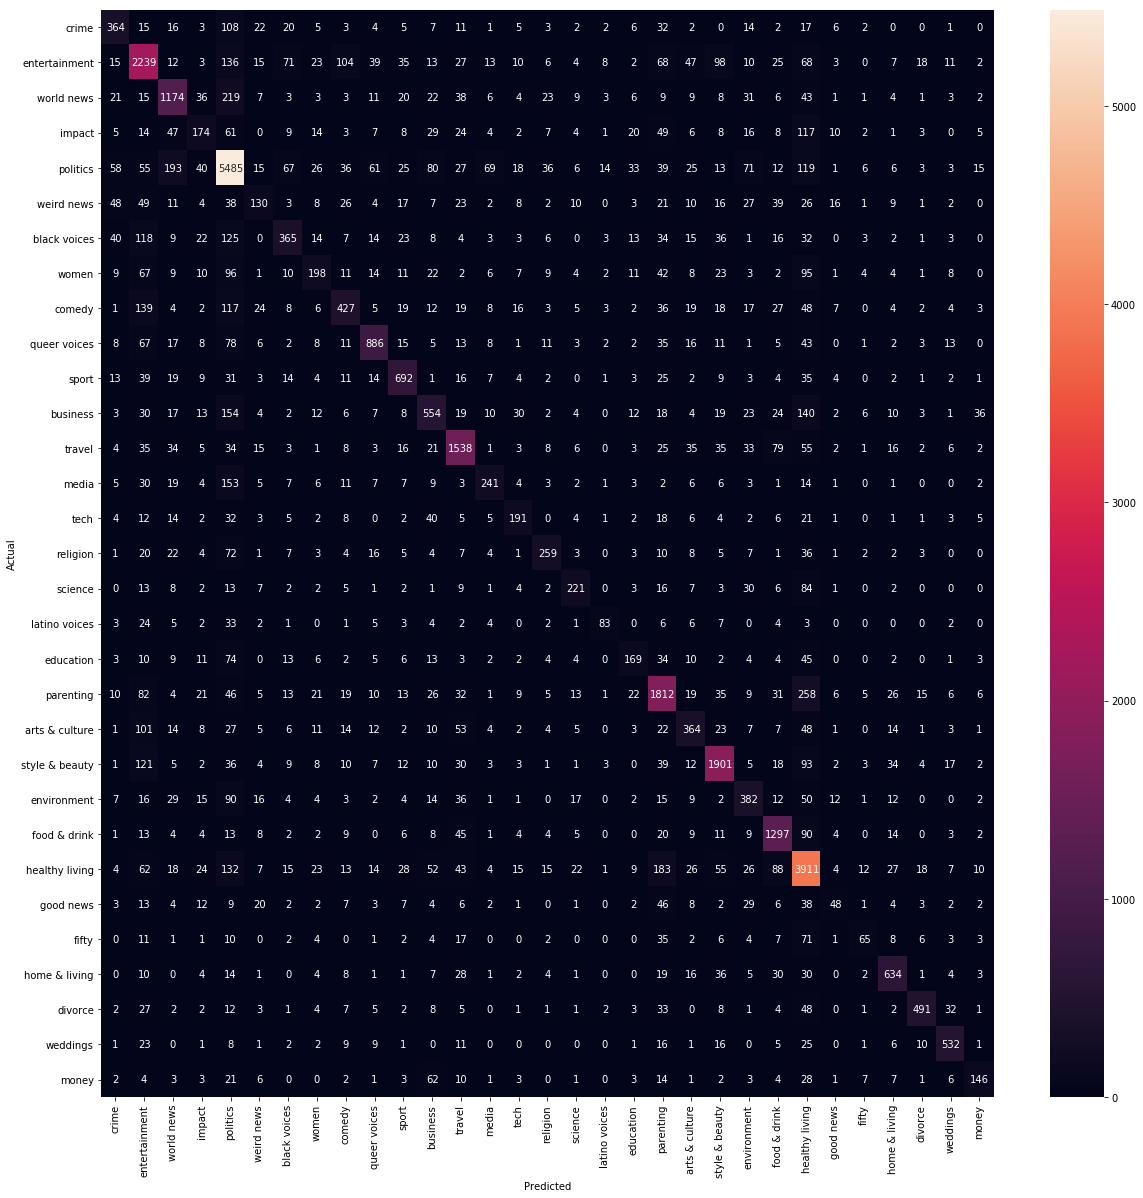

                precision    recall  f1-score   support

         crime       0.57      0.54      0.55       678
 entertainment       0.64      0.71      0.68      3132
    world news       0.68      0.67      0.68      1741
        impact       0.39      0.26      0.31       658
      politics       0.73      0.82      0.78      6657
    weird news       0.39      0.23      0.29       561
  black voices       0.55      0.40      0.46       920
         women       0.46      0.29      0.35       690
        comedy       0.54      0.42      0.48      1005
  queer voices       0.76      0.69      0.72      1281
         sport       0.69      0.71      0.70       971
      business       0.52      0.47      0.50      1173
        travel       0.73      0.76      0.74      2029
         media       0.58      0.43      0.50       556
          tech       0.54      0.48      0.51       400
      religion       0.61      0.51      0.55       511
       science       0.62      0.50      0.55  

In [10]:
#plot the confusion matrix
categories = df['category'].drop_duplicates().tolist()
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#print metrics for the model
print(metrics.classification_report(y_test, y_pred, target_names=df['category'].unique()))

There are 23563780 words in the combination of all review.


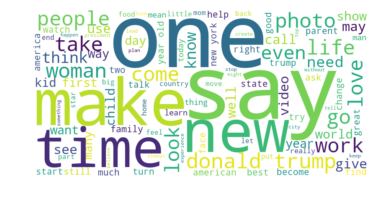

In [26]:
'''
text = " ".join(txt for txt in df.text)
print ("There are {} words in the combination of all review.".format(len(text)))
wordcloud = WordCloud(max_words=100, background_color="white", height=400, width=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("results/wordcloud_everything.png")
'''

World news
There are 1006602 words in the combination of all review.


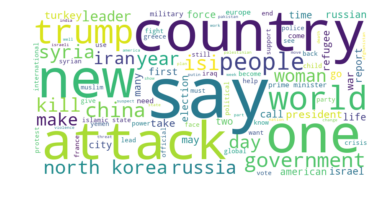

Politics
There are 3722179 words in the combination of all review.


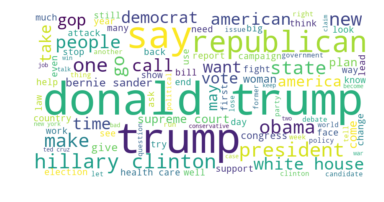

Latino voices
There are 126095 words in the combination of all review.


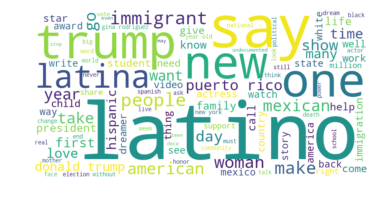

Black voices
There are 524490 words in the combination of all review.


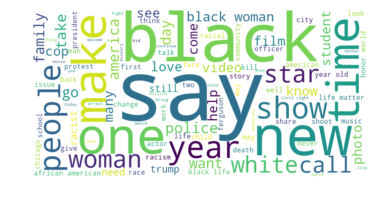

In [33]:
#most common words, BUT NOT MOST SIGNIFICANT FOR CATEGORY
#would need to extract the tf-idf values for categories
#2 similar wordclouds with overlapping classifications
#2 different wordclouds with almost no false classifications
ctgs = ['world news', 'politics', 'latino voices', 'black voices']
for i in range(4):
    text = " ".join(txt for txt in df.text[df.category == ctgs[i]])
    print(ctgs[i].capitalize())
    print ("There are {} words in the combination of all review.".format(len(text)))
    wordcloud = WordCloud(max_words=100, background_color="white", height=400, width=800).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file("results/wordcloud_" + ctgs[i] + ".png")